In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score
)
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [19]:
data = pd.read_csv('preprocessed_stress_level_dataset.csv')

In [20]:
X = data.iloc[:, :-1]
y = data['stress_level']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
param_grid_linear = {'C': [0.1, 1, 10]}
param_grid_rbf_scale = {'C': [0.1, 1, 10]}
param_grid_rbf_gamma = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

In [23]:
# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Linear SVM
model_linear = SVC(kernel='linear', probability=True, random_state=42)
grid_search_linear = GridSearchCV(model_linear, param_grid_linear, cv=cv, scoring='accuracy')
grid_search_linear.fit(X_train, y_train)

# RBF SVM with gamma='scale'
model_rbf_scale = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)
grid_search_rbf_scale = GridSearchCV(model_rbf_scale, param_grid_rbf_scale, cv=cv, scoring='accuracy')
grid_search_rbf_scale.fit(X_train, y_train)

# RBF SVM with specified gamma
model_rbf_gamma = SVC(kernel='rbf', probability=True, random_state=42)
grid_search_rbf_gamma = GridSearchCV(model_rbf_gamma, param_grid_rbf_gamma, cv=cv, scoring='accuracy')
grid_search_rbf_gamma.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
             scoring='accuracy')

In [15]:
# Get the best models and their parameters
best_linear_model = grid_search_linear.best_estimator_
best_linear_params = grid_search_linear.best_params_
print(f"Best parameters for Linear SVM: {best_linear_params}")

best_rbf_scale_model = grid_search_rbf_scale.best_estimator_
best_rbf_scale_params = grid_search_rbf_scale.best_params_
print(f"Best parameters for RBF SVM (gamma='scale'): {best_rbf_scale_params}")

best_rbf_gamma_model = grid_search_rbf_gamma.best_estimator_
best_rbf_gamma_params = grid_search_rbf_gamma.best_params_
print(f"Best parameters for RBF SVM (specified gamma): {best_rbf_gamma_params}")

# Evaluate the best models on the test set
best_models_results = []

# Evaluate Linear SVM
y_pred_linear = best_linear_model.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear, average='weighted')
recall_linear = recall_score(y_test, y_pred_linear, average='weighted')
f1_linear = f1_score(y_test, y_pred_linear, average='weighted')

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_proba_linear = best_linear_model.predict_proba(X_test)
auc_linear = roc_auc_score(y_test_bin, y_pred_proba_linear, multi_class='ovr')

cm_linear = confusion_matrix(y_test, y_pred_linear)

best_models_results.append({
    'model': f"Linear SVM (tuned: {best_linear_params})",
    'accuracy': accuracy_linear,
    'precision': precision_linear,
    'recall': recall_linear,
    'f1': f1_linear,
    'auc': auc_linear,
    'confusion_matrix': cm_linear
})

# Evaluate RBF SVM with gamma='scale'
y_pred_rbf_scale = best_rbf_scale_model.predict(X_test)
accuracy_rbf_scale = accuracy_score(y_test, y_pred_rbf_scale)
precision_rbf_scale = precision_score(y_test, y_pred_rbf_scale, average='weighted')
recall_rbf_scale = recall_score(y_test, y_pred_rbf_scale, average='weighted')
f1_rbf_scale = f1_score(y_test, y_pred_rbf_scale, average='weighted')

y_pred_proba_rbf_scale = best_rbf_scale_model.predict_proba(X_test)
auc_rbf_scale = roc_auc_score(y_test_bin, y_pred_proba_rbf_scale, multi_class='ovr')

cm_rbf_scale = confusion_matrix(y_test, y_pred_rbf_scale)

best_models_results.append({
    'model': f"RBF SVM (gamma='scale', tuned: {best_rbf_scale_params})",
    'accuracy': accuracy_rbf_scale,
    'precision': precision_rbf_scale,
    'recall': recall_rbf_scale,
    'f1': f1_rbf_scale,
    'auc': auc_rbf_scale,
    'confusion_matrix': cm_rbf_scale
})

# Evaluate RBF SVM with specified gamma
y_pred_rbf_gamma = best_rbf_gamma_model.predict(X_test)
accuracy_rbf_gamma = accuracy_score(y_test, y_pred_rbf_gamma)
precision_rbf_gamma = precision_score(y_test, y_pred_rbf_gamma, average='weighted')
recall_rbf_gamma = recall_score(y_test, y_pred_rbf_gamma, average='weighted')
f1_rbf_gamma = f1_score(y_test, y_pred_rbf_gamma, average='weighted')

y_pred_proba_rbf_gamma = best_rbf_gamma_model.predict_proba(X_test)
auc_rbf_gamma = roc_auc_score(y_test_bin, y_pred_proba_rbf_gamma, multi_class='ovr')

cm_rbf_gamma = confusion_matrix(y_test, y_pred_rbf_gamma)

best_models_results.append({
    'model': f"RBF SVM (specified gamma, tuned: {best_rbf_gamma_params})",
    'accuracy': accuracy_rbf_gamma,
    'precision': precision_rbf_gamma,
    'recall': recall_rbf_gamma,
    'f1': f1_rbf_gamma,
    'auc': auc_rbf_gamma,
    'confusion_matrix': cm_rbf_gamma
})

# Print results
print("\nEvaluation of Best Tuned Models on Test Set:")
for result in best_models_results:
    print(f"\nModel: {result['model']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1']:.4f}")
    print(f"AUC: {result['auc']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])

Best parameters for Linear SVM: {'C': 1}
Best parameters for RBF SVM (gamma='scale'): {'C': 0.1}
Best parameters for RBF SVM (specified gamma): {'C': 10, 'gamma': 1}

Evaluation of Best Tuned Models on Test Set:

Model: Linear SVM (tuned: {'C': 1})
Accuracy: 0.8773
Precision: 0.8787
Recall: 0.8773
F1 Score: 0.8776
AUC: 0.9690
Confusion Matrix:
[[67  4  5]
 [ 4 64  5]
 [ 8  1 62]]

Model: RBF SVM (gamma='scale', tuned: {'C': 0.1})
Accuracy: 0.8909
Precision: 0.9004
Recall: 0.8909
F1 Score: 0.8919
AUC: 0.9880
Confusion Matrix:
[[69  0  7]
 [ 4 61  8]
 [ 5  0 66]]

Model: RBF SVM (specified gamma, tuned: {'C': 10, 'gamma': 1})
Accuracy: 0.8864
Precision: 0.8866
Recall: 0.8864
F1 Score: 0.8864
AUC: 0.9755
Confusion Matrix:
[[68  4  4]
 [ 4 65  4]
 [ 6  3 62]]



Comparison of Best Tuned Model Variations:

Model: Linear SVM (tuned: {'C': 1})
Accuracy: 0.8773
Precision: 0.8787
Recall: 0.8773
F1 Score: 0.8776
AUC: 0.9690
Confusion Matrix:
[[67  4  5]
 [ 4 64  5]
 [ 8  1 62]]


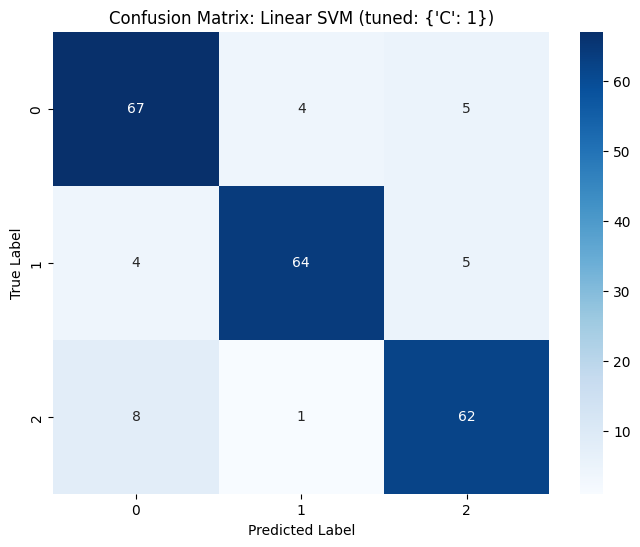


Model: RBF SVM (gamma='scale', tuned: {'C': 0.1})
Accuracy: 0.8909
Precision: 0.9004
Recall: 0.8909
F1 Score: 0.8919
AUC: 0.9880
Confusion Matrix:
[[69  0  7]
 [ 4 61  8]
 [ 5  0 66]]


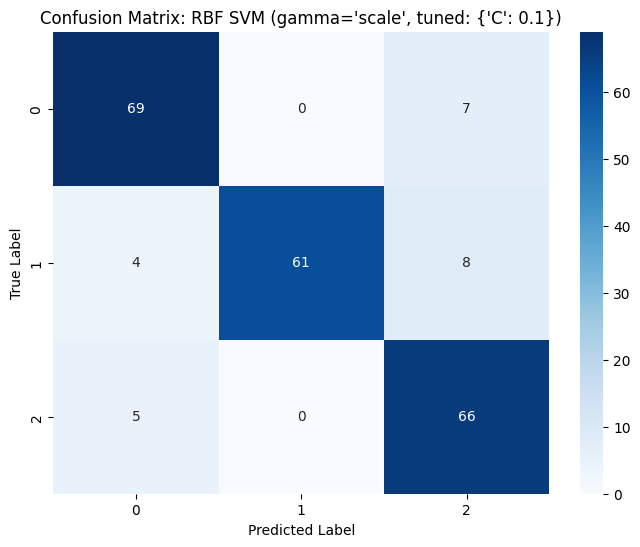


Model: RBF SVM (specified gamma, tuned: {'C': 10, 'gamma': 1})
Accuracy: 0.8864
Precision: 0.8866
Recall: 0.8864
F1 Score: 0.8864
AUC: 0.9755
Confusion Matrix:
[[68  4  4]
 [ 4 65  4]
 [ 6  3 62]]


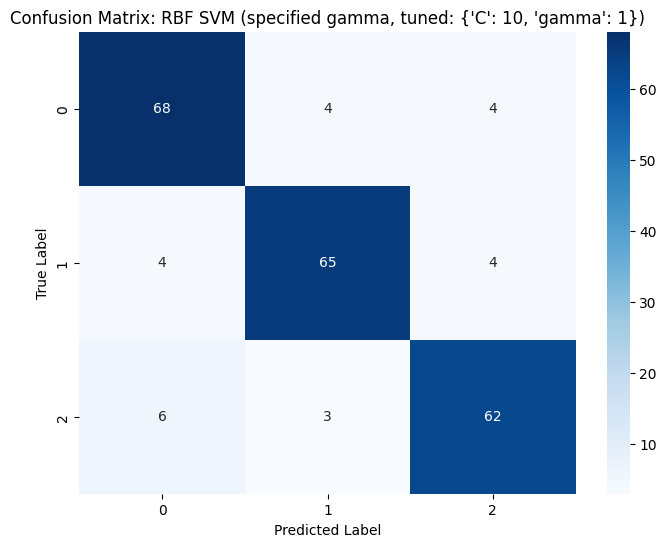


Overall Best Model Based on Accuracy: RBF SVM (gamma='scale', tuned: {'C': 0.1})
Accuracy: 0.8909


In [17]:
# Collect the evaluation results for the best models from each variation
# best_models_results is already available from the previous step

# Iterate through the results and print the evaluation metrics
print("\nComparison of Best Tuned Model Variations:")
for result in best_models_results:
    print(f"\nModel: {result['model']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1']:.4f}")
    print(f"AUC: {result['auc']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])

    # Plot confusion matrix
    artifact_id = str(uuid.uuid4())
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {result["model"]}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'confusion_matrix_tuned_{artifact_id}.png')
    plt.show()


# Determine and print the model with the highest accuracy
best_overall_model = max(best_models_results, key=lambda x: x['accuracy'])

print(f"\nOverall Best Model Based on Accuracy: {best_overall_model['model']}")
print(f"Accuracy: {best_overall_model['accuracy']:.4f}")